In [97]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

!pip install imutils

from imutils import paths

In [98]:
from google.colab import drive
drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle/Dogs vs Cats

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Kaggle/Dogs vs Cats


In [102]:
!kaggle datasets download -d biaiscience/dogs-vs-cats
!unzip -qq \*.zip
%rm *.zip

 99% 809M/817M [00:17<00:00, 46.3MB/s]
100% 817M/817M [00:17<00:00, 47.7MB/s]


In [0]:
# Only pick 1000 samples by class and 400 aditional samples from each class as validation data
%%bash
rm -r data
mkdir -p data/train/dogs data/train/cats data/validation/dogs data/validation/cats data/test
find train/train -name 'dog.*' | head -1000 | xargs -I filename cp filename data/train/dogs
find train/train -name 'dog.*' | head -400 | xargs -I filename cp filename data/validation/dogs
find train/train -name 'cat.*' | head -1000 | xargs -I filename cp filename data/train/cats
find train/train -name 'cat.*' | head -400 | xargs -I filename cp filename data/validation/cats
cd '/content/gdrive/My Drive/Kaggle/Dogs vs Cats/test/test'
ls| head -30 | xargs -I filename cp filename ../../data/test
cd '/content/gdrive/My Drive/Kaggle/Dogs vs Cats'

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
batch_size = 16

input_shape = (img_width, img_height, 3)

In [0]:
# train augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# for testing only rescaling
val_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
# build model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout

# load the VGG16 network, ensuring the head fully connected layer sets are left
model_vgg16_conv = VGG16(weights="imagenet", include_top=False)
# Make VGG16 model layers as non trainable
for layer in model_vgg16_conv.layers:
    layer.trainable = False

input = Input(shape=input_shape)
# use the generated model 
output_vgg16_conv = model_vgg16_conv(input)

top_model = Flatten()(output_vgg16_conv)
top_model = Dense(256, activation='relu')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(1, activation='sigmoid')(top_model)

model = Model(inputs=input, outputs=top_model)

In [0]:
from keras.optimizers import SGD

model.compile(
    loss='binary_crossentropy',
    optimizer=SGD(lr=1e-4, momentum=0.9),
    metrics=['accuracy']
)

In [108]:
train_generator = train_datagen.flow_from_directory(
  'data/train',
  target_size=(150, 150),
  batch_size=batch_size,
  class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
  'data/validation',
  target_size=(150, 150),
  batch_size=batch_size,
  class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [109]:
epochs = 50

history = model.fit_generator(
  train_generator,
  steps_per_epoch=nb_train_samples // batch_size,
  epochs=epochs,
  validation_data=validation_generator,
  validation_steps=nb_validation_samples // batch_size
)

Epoch 1/50
125/125 [==============================] - 29s 231ms/step - loss: 0.6640 - accuracy: 0.6090 - val_loss: 0.5323 - val_accuracy: 0.7800
Epoch 2/50
125/125 [==============================] - 27s 213ms/step - loss: 0.5552 - accuracy: 0.7145 - val_loss: 0.4159 - val_accuracy: 0.8288
Epoch 3/50
125/125 [==============================] - 26s 208ms/step - loss: 0.5060 - accuracy: 0.7520 - val_loss: 0.5102 - val_accuracy: 0.8250
Epoch 4/50
125/125 [==============================] - 26s 208ms/step - loss: 0.4655 - accuracy: 0.7830 - val_loss: 0.4879 - val_accuracy: 0.8175
Epoch 5/50
125/125 [==============================] - 26s 208ms/step - loss: 0.4427 - accuracy: 0.8060 - val_loss: 0.4494 - val_accuracy: 0.8350
Epoch 6/50
125/125 [==============================] - 26s 210ms/step - loss: 0.4223 - accuracy: 0.8025 - val_loss: 0.3896 - val_accuracy: 0.8562
Epoch 7/50
125/125 [==============================] - 26s 207ms/step - loss: 0.4133 - accuracy: 0.8150 - val_loss: 0.2352 - val_ac

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 15 could not be retrieved. It could be because a worker has died.
  UserWarning)


125/125 [==============================] - 77s 613ms/step - loss: 0.3011 - accuracy: 0.8725 - val_loss: 0.1179 - val_accuracy: 0.9050
Epoch 32/50
125/125 [==============================] - 26s 207ms/step - loss: 0.2995 - accuracy: 0.8695 - val_loss: 0.0991 - val_accuracy: 0.9087
Epoch 33/50
125/125 [==============================] - 26s 204ms/step - loss: 0.2862 - accuracy: 0.8820 - val_loss: 0.2340 - val_accuracy: 0.8712
Epoch 34/50
125/125 [==============================] - 26s 206ms/step - loss: 0.2944 - accuracy: 0.8775 - val_loss: 0.3616 - val_accuracy: 0.9013
Epoch 35/50
125/125 [==============================] - 26s 205ms/step - loss: 0.2869 - accuracy: 0.8900 - val_loss: 0.2660 - val_accuracy: 0.9162
Epoch 36/50
125/125 [==============================] - 26s 208ms/step - loss: 0.2801 - accuracy: 0.8830 - val_loss: 0.1966 - val_accuracy: 0.9075
Epoch 37/50
125/125 [==============================] - 25s 202ms/step - loss: 0.2773 - accuracy: 0.8890 - val_loss: 0.1965 - val_accurac

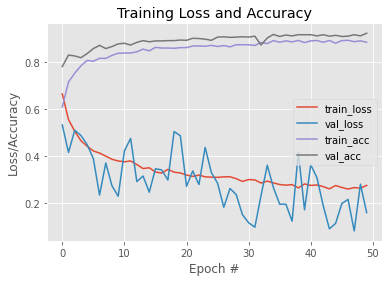

In [110]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [0]:
imagePaths = list(paths.list_images('data/test'))
X_test = []
# loop over the image paths
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (img_width, img_height))
    # update the data and labels lists, respectively
    X_test.append(image)

X_test = np.array(X_test) / 255.0 # normalize data

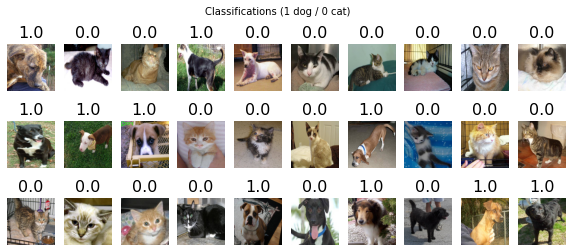

In [116]:
Y_predict = model.predict(X_test).reshape(-1)
Y_predict[Y_predict >= 0.5] = 1
Y_predict[Y_predict < 0.5] = 0
size = 30
rows = 3
f = plt.figure(figsize=(size // rows, rows + 1))
plt.suptitle("Classifications (1 dog / 0 cat)", fontsize=10)
for i in range(size):
    sp = f.add_subplot(rows, -(-size // rows), i + 1)
    sp.axis('Off')
    plt.imshow(X_test[i])
    sp.set_title(Y_predict[i], fontsize=16)